# Lesson: Natural Language Processing - ACQUIRE - WEB SCRAPING

<a href = "https://www.canva.com/design/DAFl_9iaHIU/XGp0vYPPY6vsXZF70G9gCw/view?utm_content=DAFl_9iaHIU&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">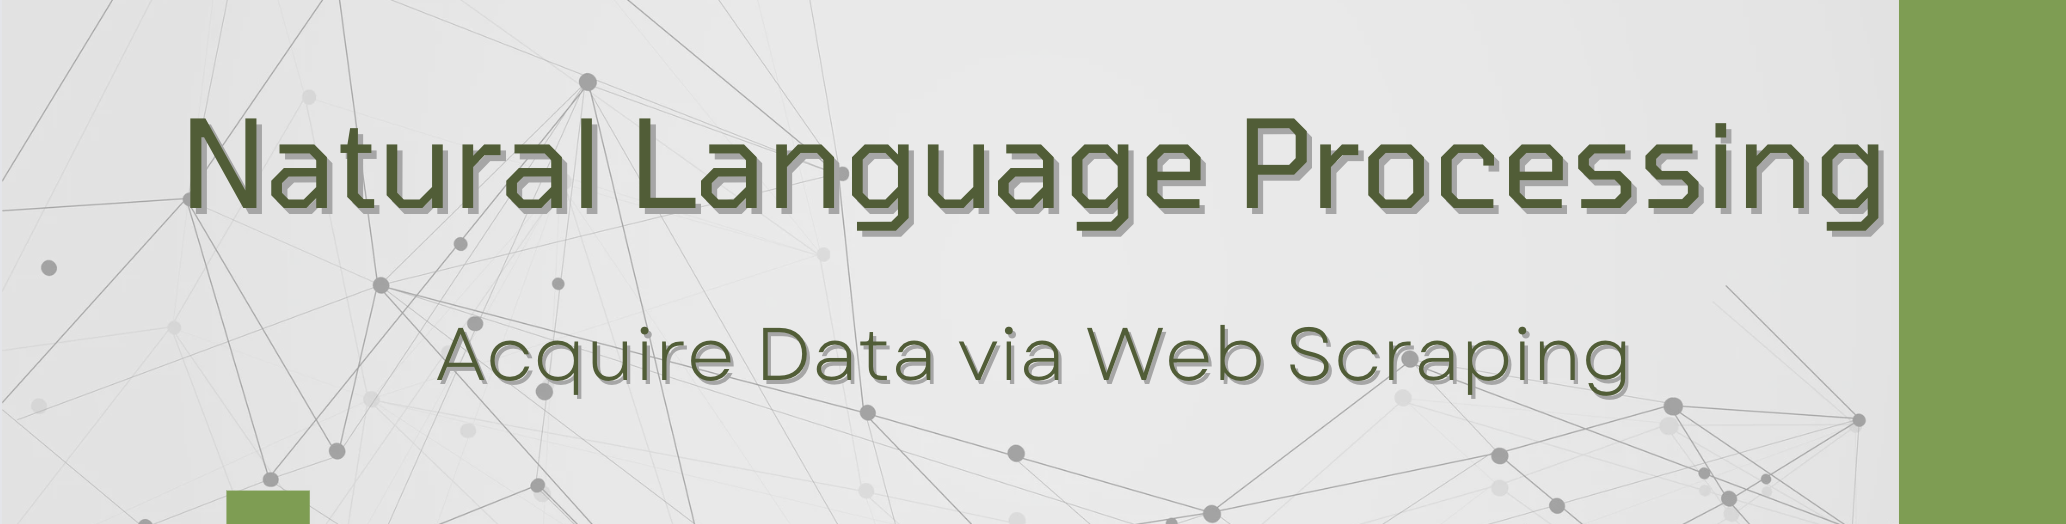</a>

<hr style="border:2px solid gray">

# Steps
## 1. Import the `get()` function from the `requests` module, `BeautifulSoup` from `bs4`, and `pandas`.
## 2. Assign the address of the web page to a variable named `url`.
## 3. Request the server the content of the web page by using `get()`, and store the server’s response in the variable `response`.
## 4. Print the response `text` to ensure you have an html page.
## 5. Take a look at the actual web page contents and inspect the source to understand the structure a bit.
## 6. Use BeautifulSoup to parse the HTML into a variable (`soup`).
## 7. Identify the key tags you need to extract the data you are looking for.

___

## Step 1.

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
from pprint import pprint 

## Step 2 & 3.

In [2]:
url = 'https://codeup.com/data-science/math-in-data-science/'
response = get(url)
response

<Response [403]>

### Some websites don't accept the python-requests default user-agent and will return a **403 Forbidden** or **401 Unauthorized** status code. 
- This indicates that the server has understood the request but refuses to fulfill it, likely due to the unrecognized or blocked user-agent.

- You can modify the user-agent header in your requests to mimic a different user-agent, such as a web browser, and see if the website responds positively.

In [3]:
requests.utils.default_headers()

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]

In [4]:
headers = {"User-Agent": "Chrome/91.0.4472.124"}
response = get(url, headers=headers)
response

<Response [200]>

## Step 4.

In [7]:
pprint(response.text[:400])

('<!DOCTYPE html>\n'
 '<html lang="en-US">\n'
 '<head>\n'
 '\t<meta charset="UTF-8" />\n'
 '<meta http-equiv="X-UA-Compatible" content="IE=edge">\n'
 '\t<link rel="pingback" href="https://codeup.com/xmlrpc.php" />\n'
 '\n'
 '\t<script type="text/javascript">\n'
 "\t\tdocument.documentElement.className = 'js';\n"
 '\t</script>\n'
 '\t\n'
 '\t<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin '
 '/><script id="diviarea-loader">window.DiviPopupData=wi')


## Step 5.

Let's visit the <a href = "https://codeup.com/data-science/math-in-data-science/">blog's website</a> and apply the following Developer Tools to examine the HTML structure:
- `command + option + u` will let you view the source of a page in chrome.
- `command + option + i` will open up the chrome dev tools page inspector.
    - `command + shift + c` will turn on the ability to hover over elements to find their corresponding HTML code. 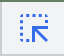
- Right clicking on specific text in the page and selecting 'inspect' will take you right to the html of that text


In [10]:
pprint(response.content)

(b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n\t<meta charset="UTF-8" />'
 b'\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<link rel="pingb'
 b'ack" href="https://codeup.com/xmlrpc.php" />\n\n\t<script type="text/javasc'
 b'ript">\n\t\tdocument.documentElement.className = \'js\';\n\t</script>\n\t'
 b'\n\t<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin />'
 b'<script id="diviarea-loader">window.DiviPopupData=window.DiviAreaConfig={"zI'
 b'ndex":1000000,"animateSpeed":400,"triggerClassPrefix":"show-popup-","idAttri'
 b'b":"data-popup","modalIndicatorClass":"is-modal","blockingIndicatorClass":"i'
 b's-blocking","defaultShowCloseButton":true,"withCloseClass":"with-close","noC'
 b'loseClass":"no-close","triggerCloseClass":"close","singletonClass":"single",'
 b'"darkModeClass":"dark","noShadowClass":"no-shadow","altCloseClass":"close-al'
 b't","popupSelector":".et_pb_section.popup","initializeOnEvent":"et_pb_after_i'
 b'nit_modules","popupWrapperClass":"ar

## <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Step 6.</a>

In [11]:
# Make a soup variable holding the response content
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://codeup.com/xmlrpc.php" rel="pingback"/>
<script type="text/javascript">
		document.documentElement.className = 'js';
	</script>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/><script id="diviarea-loader">window.DiviPopupData=window.DiviAreaConfig={"zIndex":1000000,"animateSpeed":400,"triggerClassPrefix":"show-popup-","idAttrib":"data-popup","modalIndicatorClass":"is-modal","blockingIndicatorClass":"is-blocking","defaultShowCloseButton":true,"withCloseClass":"with-close","noCloseClass":"no-close","triggerCloseClass":"close","singletonClass":"single","darkModeClass":"dark","noShadowClass":"no-shadow","altCloseClass":"close-alt","popupSelector":".et_pb_section.popup","initializeOnEvent":"et_pb_after_init_modules","popupWrapperClass":"area-outer-wrap","fullHeightClass":"full-height","openPopupClass":"da-overlay-visible","ove

## Step 7.

In [12]:
#webpg title ELEMENT
soup.h1

<h1 class="entry-title">What are the Math and Stats Principles You Need for Data Science?</h1>

In [13]:
#webpg title
soup.h1.text

'What are the Math and Stats Principles You Need for Data Science?'

In [14]:
# 1st paragraph element
soup.p

<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a></p>

In [15]:
#same thing as above
soup.find('p')

<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a></p>

In [16]:
#ALL paragraph elements
soup.find_all('p')

[<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a></p>,
 <p><span style="font-weight: 400;">Coming into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the </span><a href="https://codeup.com/codeups-application-process/"><span style="font-weight: 400;">application process</span></a><span style="font-weight: 400;"> – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, exactly? Just what exactly are the data science math and stats principles you need to know?</span></p>,
 <p><strong>Algebra</strong></p>,
 <p><span style="font-weight: 400;">Do you know PEMDAS and can you solve for x? You will need to be or become comfortable with t

In [17]:
list_of_p_elements = soup.find_all('p')
list_of_p_elements

[<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a></p>,
 <p><span style="font-weight: 400;">Coming into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the </span><a href="https://codeup.com/codeups-application-process/"><span style="font-weight: 400;">application process</span></a><span style="font-weight: 400;"> – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, exactly? Just what exactly are the data science math and stats principles you need to know?</span></p>,
 <p><strong>Algebra</strong></p>,
 <p><span style="font-weight: 400;">Do you know PEMDAS and can you solve for x? You will need to be or become comfortable with t

In [18]:
for element in list_of_p_elements:
    print(element.a)#a for anchors will give us the hyperlinks

<a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a>
<a href="https://codeup.com/codeups-application-process/"><span style="font-weight: 400;">application process</span></a>
None
None
None
None
None
None
None
<a href="https://codeup.com/apply-now"><span style="font-weight: 400;">apply!</span></a>
None
None
None
None
None
None
None
None
None
None
<a href="http://www.codeup.com/apply">apply</a>
None
None
None
None
<a href="tel:12108027289" title="call Codeup">(210) 802–7289</a>
<a href="/dallas">Dallas</a>
<a href="/privacy/">Privacy Policy</a>
None
None
None
None
None
None


### <a href = "https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors">CSS Selectors</a>

In [19]:
# gives the results of `find_all`
soup.select('p')

[<p class="post-meta"><span class="published">Oct 21, 2020</span> | <a href="https://codeup.com/category/data-science/" rel="category tag">Data Science</a></p>,
 <p><span style="font-weight: 400;">Coming into our Data Science program, you will need to know some math and stats. However, many of our applicants actually learn in the </span><a href="https://codeup.com/codeups-application-process/"><span style="font-weight: 400;">application process</span></a><span style="font-weight: 400;"> – you don’t need to be an expert before applying! Data science is a very accessible field to anyone dedicated to learning new skills, and we can work with any applicant to help them learn what they need to know. But what “skills” do we mean, exactly? Just what exactly are the data science math and stats principles you need to know?</span></p>,
 <p><strong>Algebra</strong></p>,
 <p><span style="font-weight: 400;">Do you know PEMDAS and can you solve for x? You will need to be or become comfortable with t

In [20]:
soup.select("footer")

[<footer class="et-l et-l--footer">
 <div class="et_builder_inner_content et_pb_gutters3">
 <div class="et_pb_section et_pb_section_0_tb_footer et_pb_with_background et_section_regular">
 <div class="et_pb_row et_pb_row_0_tb_footer">
 <div class="et_pb_column et_pb_column_4_4 et_pb_column_0_tb_footer et_pb_css_mix_blend_mode_passthrough et-last-child">
 <div class="et_pb_module et_pb_text et_pb_text_0_tb_footer et_pb_text_align_left et_pb_bg_layout_light">
 <div class="et_pb_text_inner"><h3 style="text-align: center;">Get Program Details &amp; Pricing</h3>
 <p style="text-align: center;">Submit your email address to gain access to more information about our programs, financial aid, and benefits.</p></div>
 </div><div class="et_pb_module et_pb_code et_pb_code_0_tb_footer">
 <div class="et_pb_code_inner"><script charset="utf-8" src="//js.hsforms.net/forms/embed/v2.js" type="text/javascript"></script>
 <script>
   hbspt.forms.create({
     region: "na1",
     portalId: "2817329",
     for

In [21]:
# The id selector is denoted with a #
soup.select("#dm-menu")

[<ul class="nav" id="dm-menu"><li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-home menu-item-16491"><a href="https://codeup.com/">Home</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18125"><a href="https://codeup.com/program/cloud-adminsitration/">Cloud Administration</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-course menu-item-16497"><a href="https://codeup.com/program/full-stack-web-development/">Full Stack Web Development</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-course menu-item-16496"><a href="https://codeup.com/program/data-science/">Data Science</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-has-children menu-item-18628"><a href="/events/">Workshops</a>
 <ul class="sub-menu">
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18896"><a href="/san-antonio-events/">San Antonio</a></li>
 

In [22]:
# The class selector is denoted with a . symbol before the class name
soup.select(".dm-search")

[<div class="dm-search">
 <div id="et_top_search_mob">
 <span id="et_search_icon"></span>
 <div class="dm-search-box" style="opacity: 0;">
 <form action="https://codeup.com/" class="et-search-form" method="get" role="search">
 <input class="et-search-field" name="s" placeholder="Search …" title="Search for:" type="search" value=""/> </form>
 <span class="close"></span>
 </div>
 </div>
 </div>]

In [23]:
soup.select(".sub-menu")

[<ul class="sub-menu">
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18896"><a href="/san-antonio-events/">San Antonio</a></li>
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-18897"><a href="/dallas-events/">Dallas</a></li>
 </ul>,
 <ul class="sub-menu">
 <li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-16895"><a href="/my-story/">Student Reviews</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page current_page_parent menu-item-16504"><a href="https://codeup.com/blog/">Blog</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16505"><a href="https://codeup.com/frequently-asked-questions/">Common Questions</a></li>
 <li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-16685"><a href="https://codeup.com/podcast/">Hire Tech Podcast</a></li>
 </ul>,
 <ul class="sub-menu">
 <li class="et_pb_menu_page_id-186 menu-item 

## Using sleep

In [24]:
import time

print("Hello")
time.sleep(5)
print("world!")

Hello
world!


## <a href = "https://www.nytimes.com/">NY Times Website</a>

In [25]:
nytresponse = requests.get('https://www.nytimes.com/')
nytresponse

<Response [200]>

In [26]:
nytsoup = BeautifulSoup(nytresponse.content, 'html.parser')
nytsoup

<!DOCTYPE html>

<html class="nytapp-vi-homepage" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">The New York Times - Breaking News, US News, World News and Videos</title>
<meta content="Live news, investigations, opinion, photos and video by the journalists of The New York Times from more than 150 countries around the world. Subscribe for coverage of U.S. and international news, politics, business, technology, science, health, arts, sports and more." data-rh="true" name="description"/><meta content="https://www.nytimes.com" data-rh="true" property="og:url"/><meta content="website" data-rh="true" property="og:type"/><meta content="The New York Times - Breaking News, US News, World News and Videos" data-rh="true" property="og:title"/><meta content="Live news, investigations, opinion, photos and video by the journalists of The New York Times from more than 150 countries around the world. Subscribe for coverage of U.S. and i

In [27]:
nytsoup.find_all('h2')

[<h2 class="css-1dv1kvn" id="site-index-label">Site Index</h2>,
 <h2 class="css-1dv1kvn">Site Information Navigation</h2>]

In [28]:
nytsoup.find_all('h3')

[<h3 class="indicate-hover css-vnb41v">Hunter Biden Investigation</h3>,
 <h3 class="indicate-hover css-vnb41v">Search for Missing Titanic Submersible</h3>,
 <h3 class="indicate-hover css-vf1hbp">Hunter Biden to Plead Guilty on Misdemeanor Tax Charges</h3>,
 <h3 class="indicate-hover css-1gb49m4">How did Hunter Biden’s journey lead to this point?</h3>,
 <h3 class="indicate-hover css-66vf3i">Judge in Trump Documents Case Sets Tentative Trial Date as Soon as August</h3>,
 <h3 class="indicate-hover css-66vf3i">Trump Real Estate Deal in Oman Underscores Ethics Concerns</h3>,
 <h3 class="indicate-hover css-66vf3i">Federal Policy on Homelessness Becomes New Target of the Right</h3>,
 <h3 class="indicate-hover css-1gb49m4">Vermont has begun removing homeless people from hotel rooms as pandemic aid runs out.</h3>,
 <h3 id="styln-titanic-submersible-hp-menu"><span class="css-14sajpe">Missing Submersible Near Titanic</span></h3>,
 <h3 class="indicate-hover css-66vf3i">Facing Logistical Challenges

In [29]:
article_links = nytsoup.find_all('a', class_="css-9mylee")
article_links

[<a aria-hidden="false" class="css-9mylee" data-uri="nyt://legacycollection/6c06f1d2-a4d8-580e-bdc1-f08be9c2d348" href="https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal"><h3 class="indicate-hover css-vnb41v">Hunter Biden Investigation</h3><div class="css-1xlo3nw"><time aria-hidden="true" class="css-12i6afj" datetime="2023-06-20T15:59:34.394Z"><div class="css-ki347z"><span class="css-1stvlmo" data-time="abs">June 20, 2023, 11:59 a.m. ET</span><span class="css-kpxlkr" data-time="rel"></span></div></time><span aria-live="polite" class="css-1dv1kvn"></span></div></a>,
 <a aria-hidden="false" class="css-9mylee" data-uri="nyt://legacycollection/3f6299e5-1f1b-5b5c-9169-564823968980" href="https://www.nytimes.com/live/2023/06/20/us/titanic-missing-submarine"><h3 class="indicate-hover css-vnb41v">Search for Missing Titanic Submersible</h3><div class="css-1xlo3nw"><time aria-hidden="true" class="css-12i6afj" datetime="2023-06-20T15:45:47.151Z"><div class="css-ki347z"><span class

In [30]:
#parse 1st link only
article_links[0]["href"]

'https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal'

In [31]:
#parse all links only
for element in article_links:
    print(element["href"])

https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal
https://www.nytimes.com/live/2023/06/20/us/titanic-missing-submarine
https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal
https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal/hunter-bidens-journey-is-a-complex-tale-that-defies-simple-narratives
https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal
https://www.nytimes.com/2023/06/20/us/politics/trump-classified-documents-trial-date.html
https://www.nytimes.com/2023/06/20/us/politics/trump-real-estate-deal-oman.html
https://www.nytimes.com/2023/06/20/us/politics/trump-classified-documents-trial-date.html
https://www.nytimes.com/2023/06/20/us/politics/federal-policy-on-homelessness-becomes-new-target-of-the-right.html
https://www.nytimes.com/2023/06/20/us/with-pandemic-aid-ending-vermonts-homeless-are-forced-from-hotels.html
https://www.nytimes.com/2023/06/20/us/politics/federal-policy-on-homelessness-becomes-new-target-of-the-right.htm

In [32]:
#put into list

links_list = []

for element in article_links:
    links_list.append(element["href"])

In [33]:
links_list

['https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal',
 'https://www.nytimes.com/live/2023/06/20/us/titanic-missing-submarine',
 'https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal',
 'https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal/hunter-bidens-journey-is-a-complex-tale-that-defies-simple-narratives',
 'https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal',
 'https://www.nytimes.com/2023/06/20/us/politics/trump-classified-documents-trial-date.html',
 'https://www.nytimes.com/2023/06/20/us/politics/trump-real-estate-deal-oman.html',
 'https://www.nytimes.com/2023/06/20/us/politics/trump-classified-documents-trial-date.html',
 'https://www.nytimes.com/2023/06/20/us/politics/federal-policy-on-homelessness-becomes-new-target-of-the-right.html',
 'https://www.nytimes.com/2023/06/20/us/with-pandemic-aid-ending-vermonts-homeless-are-forced-from-hotels.html',
 'https://www.nytimes.com/2023/06/20/us/politics/federal-policy-on-homele

In [34]:
url = links_list[0]

response = requests.get(url)
response

<Response [403]>

In [35]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [ ]:
## You can `import random` to randomly select a different user-agent from a provided list:

import random

user_agents = [
  "Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0",
  "Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0",
  "Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0"
  ]
random_user_agent = random.choice(user_agents)

headers = {'User-Agent': random_user_agent}

response = requests.get(url, headers=headers)

In [ ]:
# Or set the headers to show as Netscape Navigator on Windows 98, b/c I feel like creating an anomaly in the logs
headers = {"User-Agent": "Mozilla/4.5 (compatible; HTTrack 3.0x; Windows 98)"}

In [36]:
BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>

<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">Hunter Biden to Plead Guilty on Tax Charges: Live Updates - The New York Times</title>
<meta content="noarchive, max-image-preview:large" data-rh="true" name="robots"/><meta content="Under a deal with the Justice Department, the president’s son agreed to probation for filing his taxes late, and he can avoid a charge that he lied about his drug use when he purchased a handgun." data-rh="true" name="description"/><meta content="https://www.nytimes.com/live/2023/06/20/us/hunter-biden-plea-deal" data-rh="true" property="og:url"/><meta content="article" data-rh="true" property="og:type"/><meta content="Hunter Biden Investigation: Hunter Biden to Plead Guilty on Misdemeanor Tax Charges" data-rh="true" property="og:title"/><meta content="https://static01.nyt.com/images/2023/06/20/multimedia/20hunter-biden-blog-promo-12pm-tbvc/20hunter-biden-blog-promo-12pm-tbv